<a href="https://colab.research.google.com/github/LIONHOOD/DataStructure_Graph/blob/main/Network_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 랜덤 그래프

*과제 : 랜덤 그래프에 대응되는 인접행렬의 생성 및 degree distribution의 푸아송분포 확인*

**Workflow**

1. 랜덤 방향(무방향) 그래프에 대응되는 인접행렬 생성 함수 정의 및 검증
2. 생성된 인접행렬 인스턴스로부터 degree distribution 계산
3. degree distribution의 히스토그램과 대응되는 푸아송분포의 비교 시각화 (분포 유사성 확인)

>푸아송분포

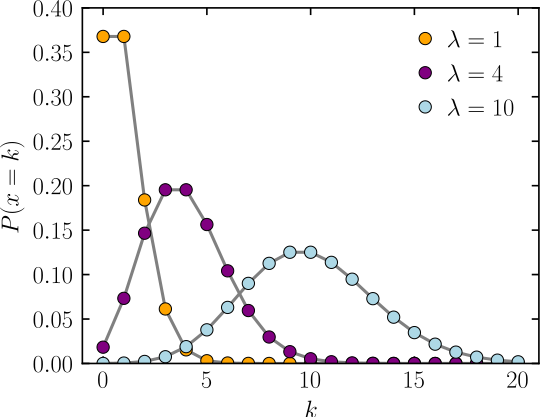

## 방향 그래프

In [ ]:
# 노드 개수 N, 연결 확률 p 인 랜덤 그래프의 인접행렬 생성 함수
# 주대각성분은 0, 즉, 연결은 서로 다른 두 노드 간 정의

# 방향 그래프 (인접행렬이 대칭행렬일 필요 없음)
# 주의) 방향 그래프에서의 연결 확률 p는 정확하게는 단방향 연결에 대한 확률을 의미
# 예) 연결 (a,b)와 (b,a)는 다른 연결이고, 각각의 확률이 p
import numpy as np
def rand_adj(N=10, p=0.5):
    A = np.random.rand(N,N)
    A = (A<p).astype(int)
    np.fill_diagonal(A, 0)
    return A

# 랜덤 방향 그래프에 대응되는 인접행렬 생성 함수가 잘 정의되었는지 실험적 확인 (검증)
N = 1000
p = 0.3
for _ in range(10):
    A = rand_adj(N, p)
    # 방법 1) 매 랜덤 생성에 대하여, 연결 확률을 잘 따르는지 확인
    print(round(np.sum(A)/(N*(N-1)),1) == p)
    # 방법 2) 랜덤 생성된 그래프 인스턴스에서 연결 링크 개수가 합리적인지 확인
    print('랜덤 생성 총 링크 개수 :', np.sum(A), '| 독립시행에 의한 총 기대 링크 개수 :', p*N*(N-1), '\n')

True
랜덤 생성 총 링크 개수 : 299717 | 독립시행에 의한 총 기대 링크 개수 : 299700.0 

True
랜덤 생성 총 링크 개수 : 300128 | 독립시행에 의한 총 기대 링크 개수 : 299700.0 

True
랜덤 생성 총 링크 개수 : 299811 | 독립시행에 의한 총 기대 링크 개수 : 299700.0 

True
랜덤 생성 총 링크 개수 : 299560 | 독립시행에 의한 총 기대 링크 개수 : 299700.0 

True
랜덤 생성 총 링크 개수 : 299161 | 독립시행에 의한 총 기대 링크 개수 : 299700.0 

True
랜덤 생성 총 링크 개수 : 299488 | 독립시행에 의한 총 기대 링크 개수 : 299700.0 

True
랜덤 생성 총 링크 개수 : 298645 | 독립시행에 의한 총 기대 링크 개수 : 299700.0 

True
랜덤 생성 총 링크 개수 : 300045 | 독립시행에 의한 총 기대 링크 개수 : 299700.0 

True
랜덤 생성 총 링크 개수 : 299397 | 독립시행에 의한 총 기대 링크 개수 : 299700.0 

True
랜덤 생성 총 링크 개수 : 300115 | 독립시행에 의한 총 기대 링크 개수 : 299700.0 



In [ ]:
# 랜덤 방향 그래프 인스턴스
N = 30 # 노드 30개
p = 0.5 # 서로 다른 두 노드 간 단방향 연결 확률 0.5
A = rand_adj(N, p)
print(A)
s0 = np.sum(A, axis=0) # in_degree
s1 = np.sum(A, axis=1) # out_degree
# 행(또는 열)별로 평균적으로 1이 약 29*0.5 ( = (N-1)*p ) 개 정도 있음을 확인
print('평균 in_degree :', np.mean(s0)) # np.sum(A)/N 도 가능
print('평균 out_degree :', np.mean(s1))
print('이론 값 :', (N-1)*p)
# 노드마다 degree ( out_degree + in_degree )가 평균적으로 약 29*0.5*2임을 확인
# 주대각성분(노드)이 위치한 행합(out_degree)과 열합(in_degree)의 합(degree)
print('평균 degree :', np.mean(s0+s1))
print('이론 값 :', (N-1)*p*2)

[[0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1]
 [0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1]
 [1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1]
 [0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1]
 [1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0]
 [1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0]
 [0 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1]
 [1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1]
 [0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1]
 [1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0]
 [0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 0]
 [1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 0]
 [1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1]
 [0 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0]
 [1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0

인접행렬
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
degree distribution
 [1 2 0 ... 1 0 2]


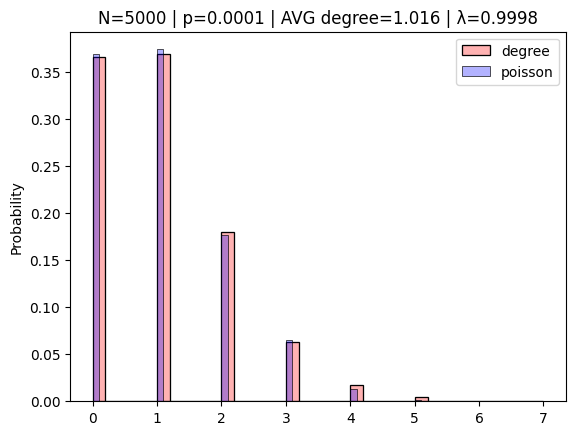

In [ ]:
# 푸아송 근사 조건(N>>p ; 과제 마지막에 설명 및 실험 별첨)을 만족하는 새로운 인접행렬 인스턴스 생성
# 랜덤 그래프는 노드 개수가 충분히 많을 때 활용하는 것으로 가정 : N>>p
import matplotlib.pyplot as plt
import seaborn as sns

# 실험) N=5000, p=0.0001
N = 5000
p = 0.0001
A = rand_adj(N, p)
print('인접행렬\n', A)
id = np.sum(A, axis=0) # in_degree
od = np.sum(A, axis=1) # out_degree
d = id + od # degree distribution
# in_degree + out_degree 에 의해 정의된 degree distribution 이 따르는 푸아송분포의 모수이자 기댓값 λ 는 2*(N-1)*p
# λ 는 AVG degree 의 이론적인 추정량
# 참고) in_degree distribution 또는 out_degree distribution 은 각각 id 와 od 를 이용하여 λ=(N-1)*p 인 푸아송분포에 대응 가능
print('degree distribution\n', d)
sns.histplot(d, stat='probability', alpha=0.3, binwidth=0.2, color='red', label='degree')
λ = 2*(N-1)*p
poi = np.random.poisson(λ, N)
sns.histplot(poi, stat='probability', alpha=0.3, binwidth=0.1, color='blue', label='poisson')
plt.title(f'N={N} | p={p} | AVG degree={np.mean(d)} | λ={λ}')
plt.legend();

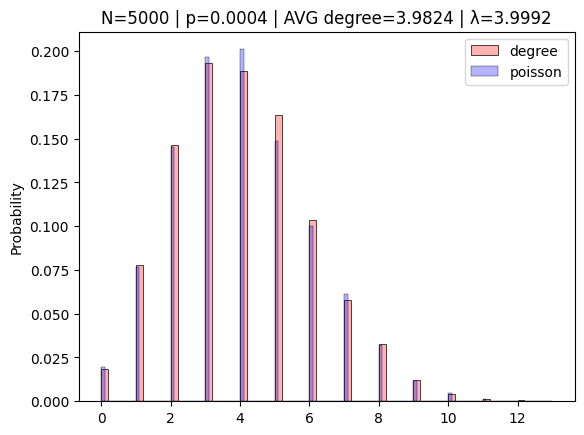

In [ ]:
# 실험) N=5000, p=0.0004
N = 5000
p = 0.0004
A = rand_adj(N, p)
id = np.sum(A, axis=0)
od = np.sum(A, axis=1)
d = id + od
sns.histplot(d, stat='probability', alpha=0.3, binwidth=0.2, color='red', label='degree')
λ = 2*(N-1)*p
poi = np.random.poisson(λ, N)
sns.histplot(poi, stat='probability', alpha=0.3, binwidth=0.1, color='blue', label='poisson')
plt.title(f'N={N} | p={p} | AVG degree={np.mean(d)} | λ={λ}')
plt.legend();

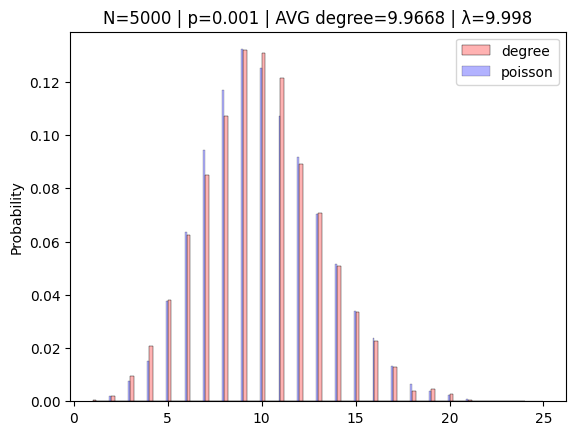

In [ ]:
# 실험) N=5000, p=0.001
N = 5000
p = 0.001
A = rand_adj(N, p)
id = np.sum(A, axis=0)
od = np.sum(A, axis=1)
d = id + od
sns.histplot(d, stat='probability', alpha=0.3, binwidth=0.2, color='red', label='degree')
λ = 2*(N-1)*p
poi = np.random.poisson(λ, N)
sns.histplot(poi, stat='probability', alpha=0.3, binwidth=0.1, color='blue', label='poisson')
plt.title(f'N={N} | p={p} | AVG degree={np.mean(d)} | λ={λ}')
plt.legend();

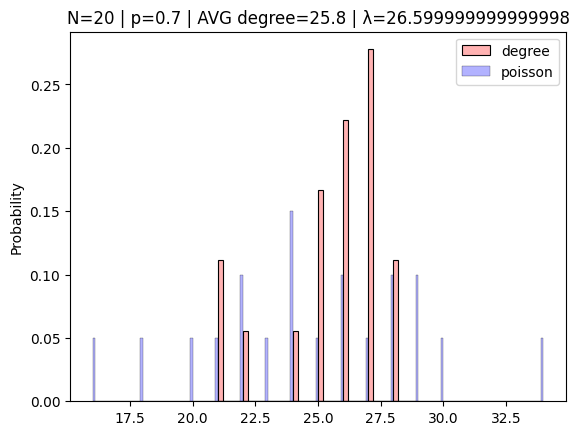

In [ ]:
# 실험) N=20, p=0.7 ; 푸아송 근사 조건 위배 (NOT N>>p)
N = 20
p = 0.7
A = rand_adj(N, p)
id = np.sum(A, axis=0)
od = np.sum(A, axis=1)
d = id + od
sns.histplot(d, stat='probability', alpha=0.3, binwidth=0.2, color='red', label='degree')
λ = 2*(N-1)*p
poi = np.random.poisson(λ, N)
sns.histplot(poi, stat='probability', alpha=0.3, binwidth=0.1, color='blue', label='poisson')
plt.title(f'N={N} | p={p} | AVG degree={np.mean(d)} | λ={λ}')
plt.legend();
# degree distribution 과 푸아송분포의 유사성이 약화됨

## 무방향 그래프

In [ ]:
# 노드 개수 N, 연결 확률 p 인 랜덤 그래프의 인접행렬 생성 함수
# 주대각성분은 0, 즉, 연결은 서로 다른 두 노드 간 정의

# 무방향 그래프 (인접행렬이 항상 대칭행렬)
import numpy as np
def rand_sym_adj(N=10, p=0.5):
    A = np.random.rand(N,N)
    A = (A<p).astype(int)
    np.fill_diagonal(A, 0)
    A = np.triu(A) + np.triu(A).T # 상부삼각행렬과 그 전치행렬의 합으로 대칭행렬 생성
    return A

# 랜덤 무방향 그래프에 대응되는 인접행렬 생성 함수가 잘 정의되었는지 실험적 확인 (검증)
N = 1000
p = 0.3
for _ in range(10):
    A = rand_sym_adj(N, p)
    # 방법 1) 매 랜덤 생성에 대하여, 연결 확률을 잘 따르는지 확인
    print(round(np.sum(A)/(N*(N-1)),1) == p)
    # 방법 2) 랜덤 생성된 그래프 인스턴스에서 연결 링크 개수가 합리적인지 확인
    print('랜덤 생성 총 링크 개수 :', np.sum(A)//2, '| 독립시행에 의한 총 기대 링크 개수 :', p*N*(N-1)/2)
    # 대칭행렬 여부 확인
    print(['Error','Symmetric'][int((A==A.T).all())], '\n')

True
랜덤 생성 총 링크 개수 : 150129 | 독립시행에 의한 총 기대 링크 개수 : 149850.0
Symmetric 

True
랜덤 생성 총 링크 개수 : 149408 | 독립시행에 의한 총 기대 링크 개수 : 149850.0
Symmetric 

True
랜덤 생성 총 링크 개수 : 149935 | 독립시행에 의한 총 기대 링크 개수 : 149850.0
Symmetric 

True
랜덤 생성 총 링크 개수 : 149681 | 독립시행에 의한 총 기대 링크 개수 : 149850.0
Symmetric 

True
랜덤 생성 총 링크 개수 : 149392 | 독립시행에 의한 총 기대 링크 개수 : 149850.0
Symmetric 

True
랜덤 생성 총 링크 개수 : 150674 | 독립시행에 의한 총 기대 링크 개수 : 149850.0
Symmetric 

True
랜덤 생성 총 링크 개수 : 149354 | 독립시행에 의한 총 기대 링크 개수 : 149850.0
Symmetric 

True
랜덤 생성 총 링크 개수 : 149956 | 독립시행에 의한 총 기대 링크 개수 : 149850.0
Symmetric 

True
랜덤 생성 총 링크 개수 : 150064 | 독립시행에 의한 총 기대 링크 개수 : 149850.0
Symmetric 

True
랜덤 생성 총 링크 개수 : 149541 | 독립시행에 의한 총 기대 링크 개수 : 149850.0
Symmetric 



In [ ]:
# 랜덤 무방향 그래프 인스턴스
N = 30 # 노드 30개
p = 0.5 # 서로 다른 두 노드 간 연결 확률 0.5
A = rand_sym_adj(N, p)
print(A)
d = np.sum(A, axis=0) # degree (무방향 그래프이므로 in 과 out 의 구분이 없음)
# 행(또는 열)별로 평균적으로 1이 약 29*0.5 ( = (N-1)*p ) 개 정도 있음을 확인
print('평균 degree :', np.mean(d)) # np.sum(A)/N 도 가능
print('이론 값 :', (N-1)*p)
print(['Error','Symmetric'][int((A==A.T).all())])

[[0 0 1 1 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 1]
 [1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1]
 [1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0]
 [1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0]
 [0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1]
 [1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0]
 [1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 1]
 [1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0]
 [0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0]
 [1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1]
 [0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0]
 [0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1]
 [0 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0]
 [0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1

인접행렬
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
degree distribution
 [0 2 0 ... 1 2 0]


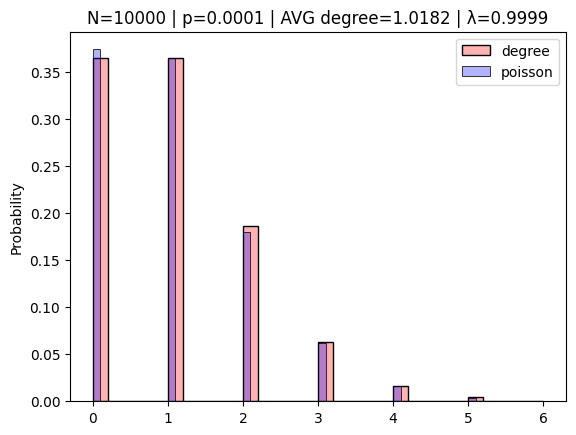

In [ ]:
# 푸아송 근사 조건(N>>p)을 만족하는 새로운 인접행렬 인스턴스 생성
# 랜덤 그래프는 노드 개수가 충분히 많을 때 활용하는 것으로 가정 : N>>p
import matplotlib.pyplot as plt
import seaborn as sns

# 실험) N=10000, p=0.0001
N = 10000
p = 0.0001
A = rand_sym_adj(N, p)
print('인접행렬\n', A)
d = np.sum(A, axis=0) # degree distribution
# 랜덤 무방향 그래프의 degree distribution 이 따르는 푸아송분포의 모수이자 기댓값 λ 는 (N-1)*p
# λ 는 AVG degree 의 이론적인 추정량
print('degree distribution\n', d)
sns.histplot(d, stat='probability', alpha=0.3, binwidth=0.2, color='red', label='degree')
λ = (N-1)*p
poi = np.random.poisson(λ, N)
sns.histplot(poi, stat='probability', alpha=0.3, binwidth=0.1, color='blue', label='poisson')
plt.title(f'N={N} | p={p} | AVG degree={np.mean(d)} | λ={λ}')
plt.legend();

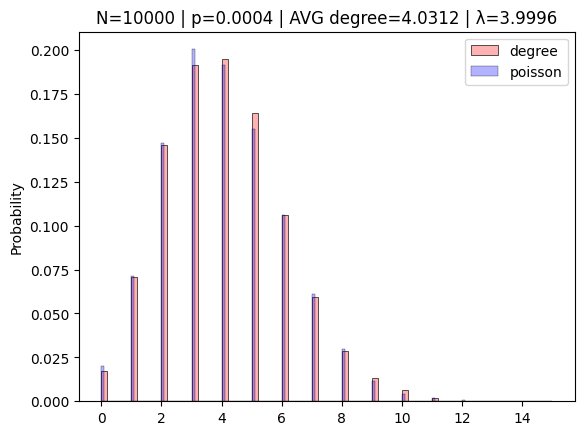

In [ ]:
# 실험) N=10000, p=0.0004
N = 10000
p = 0.0004
A = rand_sym_adj(N, p)
d = np.sum(A, axis=0)
sns.histplot(d, stat='probability', alpha=0.3, binwidth=0.2, color='red', label='degree')
λ = (N-1)*p
poi = np.random.poisson(λ, N)
sns.histplot(poi, stat='probability', alpha=0.3, binwidth=0.1, color='blue', label='poisson')
plt.title(f'N={N} | p={p} | AVG degree={np.mean(d)} | λ={λ}')
plt.legend();

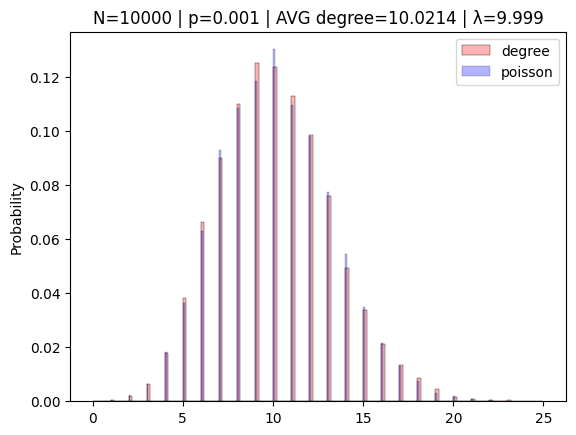

In [ ]:
# 실험) N=10000, p=0.001
N = 10000
p = 0.001
A = rand_sym_adj(N, p)
d = np.sum(A, axis=0)
sns.histplot(d, stat='probability', alpha=0.3, binwidth=0.2, color='red', label='degree')
λ = (N-1)*p
poi = np.random.poisson(λ, N)
sns.histplot(poi, stat='probability', alpha=0.3, binwidth=0.1, color='blue', label='poisson')
plt.title(f'N={N} | p={p} | AVG degree={np.mean(d)} | λ={λ}')
plt.legend();

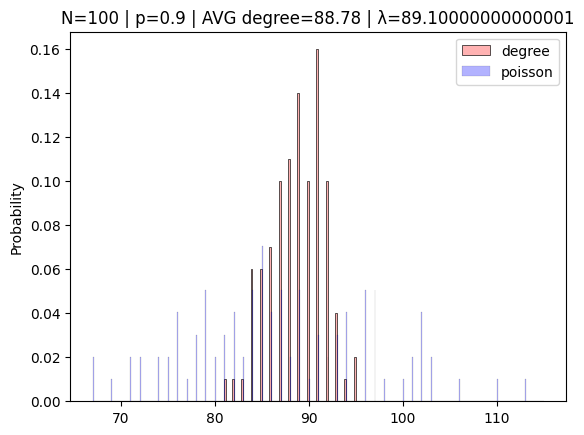

In [ ]:
# 실험) N=100, p=0.9 ; 푸아송 근사 조건 위배 (NOT N>>p)
N = 100
p = 0.9
A = rand_sym_adj(N, p)
d = np.sum(A, axis=0)
sns.histplot(d, stat='probability', alpha=0.3, binwidth=0.2, color='red', label='degree')
λ = (N-1)*p
poi = np.random.poisson(λ, N)
sns.histplot(poi, stat='probability', alpha=0.3, binwidth=0.1, color='blue', label='poisson')
plt.title(f'N={N} | p={p} | AVG degree={np.mean(d)} | λ={λ}')
plt.legend();
# degree distribution 과 푸아송분포의 유사성이 약화됨

**Summary**

1. N>>p, 즉, 충분히 많은 노드와 충분히 낮은 연결 확률에 의해 생성된 랜덤 그래프의 degree distribution 은 푸아송분포를 따르는 것을 실험적으로 확인하였다.
2. 본 실험에 적용되는 기반 이론에 대한 자세한 설명은 아래 별첨하였다.
 - 랜덤 그래프의 degree distribution 과 이항분포, 푸아송분포의 관련성
 - 푸아송 근사 및 모수 λ 결정

# Poisson approximation for Binomial distribution
advantage of Poisson approximation : <ins>simplicity</ins> (number of parameter : 2 = # { $n,p$ } ${\Large\longrightarrow}$ 1 = # { $\lambda$ })

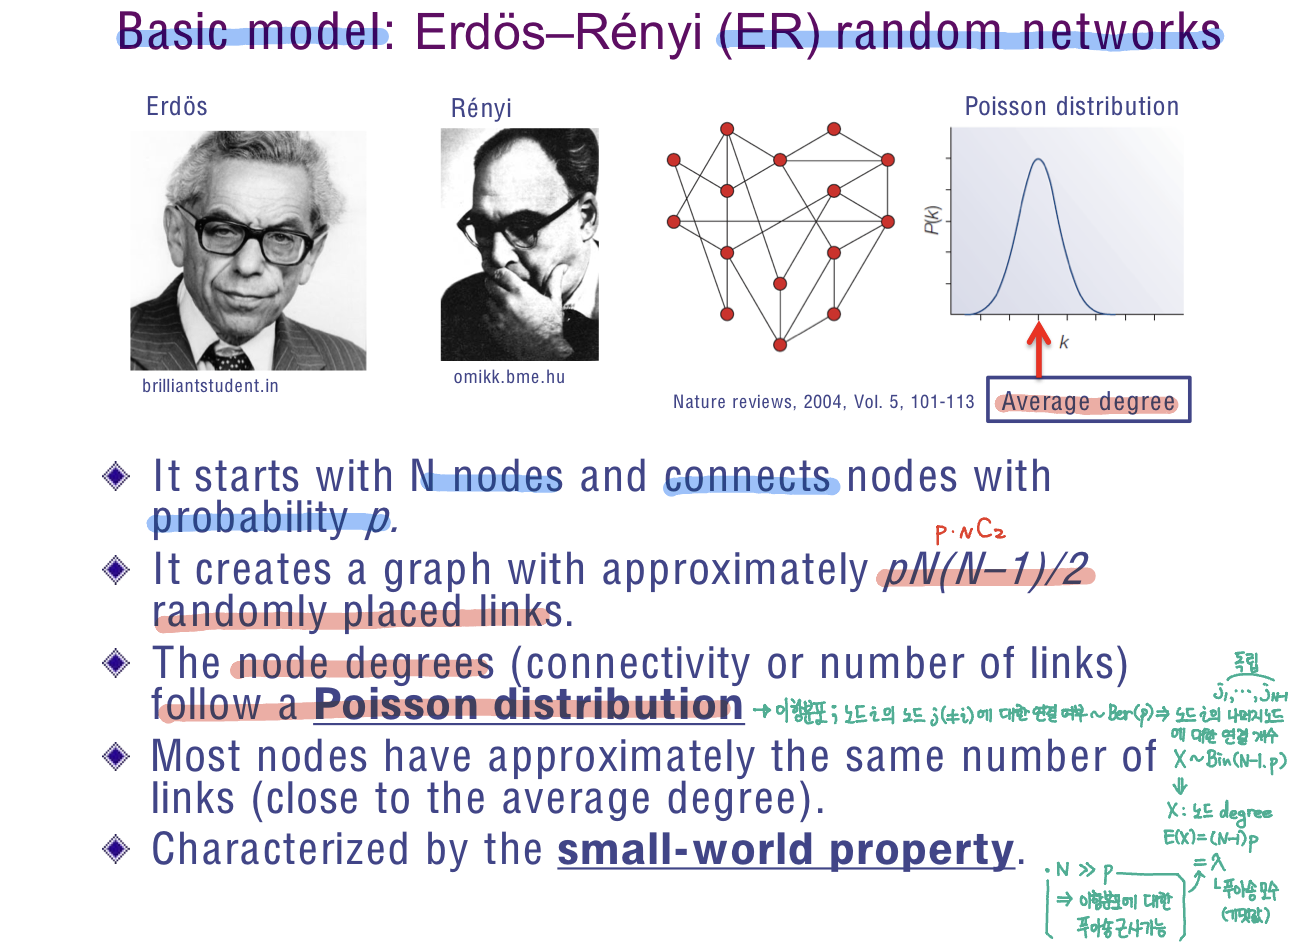

※ ER 랜덤 그래프의 임의의 노드의 degree 가 이항분포를 따르므로 노드 개수 N 이 충분히 크면 degree distribution 은 이항분포에 의해 설명될 수 있다.  
특히, 연결 확률 p 가 충분히 작다면 푸아송 근사를 적용 가능하고 degree distribution 은 푸아송분포에 의해 모델링 가능하다.

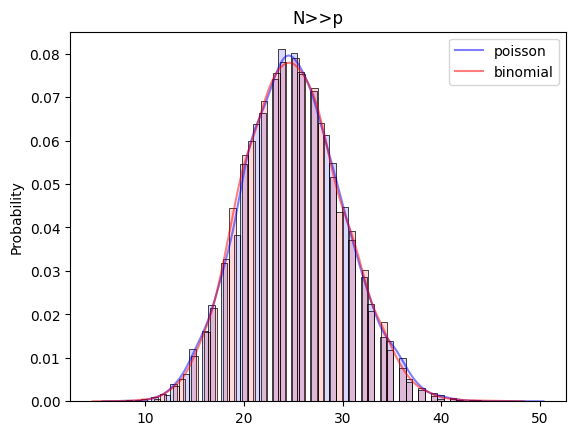

In [ ]:
# 이항분포에 대한 푸아송 근사 가능 실험
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 푸아송분포
lam = 25 # 푸아송분포 모수 (기댓값)
size = 10000 # 샘플 크기
poi = np.random.poisson(lam=lam, size=size)
# 이항분포
N = 5000 # 푸아송 근사 조건 만족 : N>>p
p = lam/N # λ=N*p
binom = np.random.binomial(n=N, p=p, size=size)
sns.histplot(poi, stat='probability', color='blue', alpha=0.15)
sns.histplot(binom, stat='probability', color='red', alpha=0.15)
sns.kdeplot(poi, c='blue', alpha=0.5, label='poisson')
sns.kdeplot(binom, c='red', alpha=0.5, label='binomial')
plt.title('N>>p')
plt.legend();

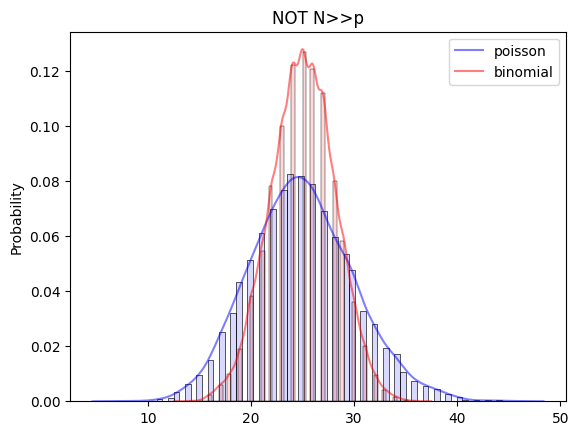

In [ ]:
# 이항분포에 대한 푸아송 근사 불가능 실험
# 푸아송분포
lam = 25 # 푸아송분포 모수 (기댓값)
size = 10000 # 샘플 크기
poi = np.random.poisson(lam=lam, size=size)
# 이항분포
N = 40 # 푸아송 근사 조건 불만족 : NOT N>>p
p = lam/N
binom = np.random.binomial(n=N, p=p, size=size)
sns.histplot(poi, stat='probability', color='blue', alpha=0.15)
sns.histplot(binom, stat='probability', color='red', alpha=0.15)
sns.kdeplot(poi, c='blue', alpha=0.5, label='poisson')
sns.kdeplot(binom, c='red', alpha=0.5, label='binomial')
plt.title('NOT N>>p')
plt.legend();

# Scale-free network 구현

## 1. 노드 1000(=N)개와 링크 8000(=L)개를 갖는 Scale-free network (BA model) 의 생성

**References**
- [*A. L. Barabási and R. Albert “Emergence of scaling in random networks”, Science 286, pp 509-512, 1999.*](https://arxiv.org/pdf/cond-mat/9910332.pdf)

### 방법 1 ) 정확히 노드 1000개와 링크 8000개에 맞춰서 생성
**Workflow**
1. degree=0 인 노드의 발생을 방지하기 위해 1000개의 노드 각각에 대하여 다른 랜덤 노드 1개와 연결
2. 1000개 노드의 degree 에 비례하는 확률분포로부터 비복원 추출된 2개의 노드 간에 링크 할당
3. 링크가 8000개 될 때까지 2를 반복

**Limitations**
- 일반적인 BA model 의 growth process 가 아님
- 처음부터 1000개의 노드에 대한 확률분포가 주어지므로 초반 성장에서 preferential attachment 가 약하게 작용
- 부익부 빈익빈 효과가 약화되어 degree 의 최댓값이 작고, 중간 degree 정도에 해당하는 노드가 많아짐
- Power-law distribution 을 부분적으로 따르거나 근사하는 정도의 그래프가 생성됨

In [ ]:
import numpy as np

def scale_free_adj(n=1000, l=8000):
    A = np.zeros((n,n))
    # Workflow 1
    for i in range(n):
        r = np.random.randint(1,n)
        if i!=r:
            A[i,r] = A[r,i] = 1
        else:
            A[i,0] = A[0,i] = 1

    # Workflow 2, 3
    while np.sum(A)/2 < l:
        d = np.sum(A, axis=0)
        ps = d / np.sum(d)
        n1,n2 = np.random.choice(n, 2, replace=False, p=ps)
        A[n1,n2] = A[n2,n1] = 1

    return A

N = 1000
L = 8000
S1 = scale_free_adj(n=N, l=L)
print('총 링크 개수 :', np.sum(S1)/2)
print(['Error','Symmetric'][int((S1==S1.T).all())])

총 링크 개수 : 8000.0
Symmetric


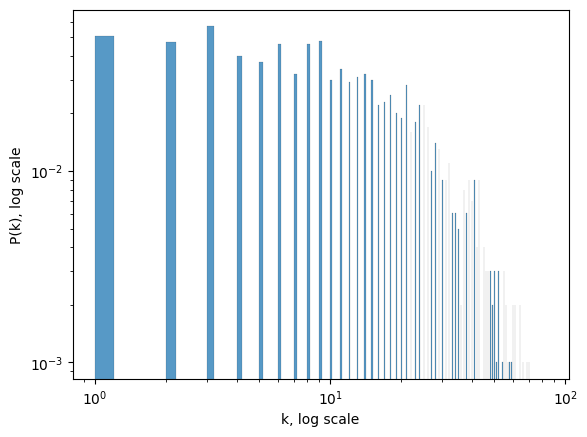

In [ ]:
# Power-law distribution 을 histogram 으로 확인
import seaborn as sns
import matplotlib.pyplot as plt

d = np.sum(S1, axis=0)
sns.histplot(d, stat='probability', binwidth=0.2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k, log scale')
plt.ylabel('P(k), log scale');

최대 degree : 83 최소 degree : 1


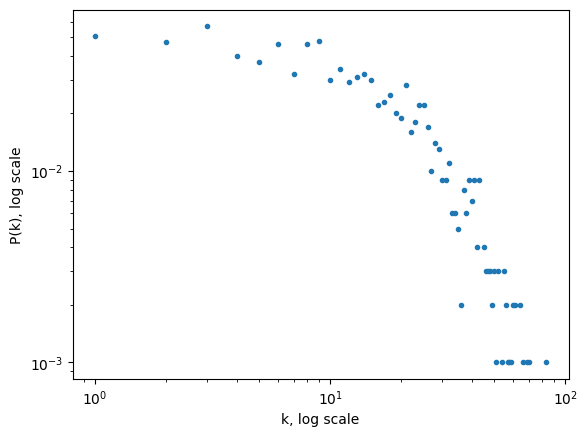

In [ ]:
# Power-law distribution 을 point 로 확인
import matplotlib.pyplot as plt

d = np.sum(S1, axis=0) # 인덱스는 노드 번호 / 요소는 해당 노드의 degree
M = int(np.max(d))
print('최대 degree :', M, '최소 degree :', int(np.min(d)))

hist_list = [0] * M # 인덱스는 degree - 1 / 요소는 해당 degree 를 갖는 노드 개수를 저장할 리스트
for i in range(M):
    hist_list[i] = list(d).count(i+1)

hist_list = np.array(hist_list)
hist_list = hist_list / np.sum(hist_list)
k = np.arange(1,M+1)
plt.plot(k, hist_list, marker='.', linestyle='')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k, log scale')
plt.ylabel('P(k), log scale');

### 방법 2 ) 일반적인 BA model 의 growth process 인 preferential attachment 구현
**Workflow**
1. 작은 크기의 초기 그래프 생성
2. 신규 노드와 링크 추가에 의한 preferential attachment
- NetworkX 라이브러리의 BA model 과 거의 동일한 알고리즘
- 자세한 과정은 주석으로 설명

**Limitations**
- 정확히 8000개의 링크를 갖도록 성장시키기 어려움
- 약 8000개의 링크를 갖도록 유도하기 위해 처음부터 신규 노드에 의한 추가 링크 수를 8로 설정
- degree 의 최솟값이 큼

In [ ]:
import numpy as np

# 초기 그래프 : ring 모양의 그래프 ; cycle_graph
# 주대각성분의 바로 위 아래 대각선 성분이 1이고, (0,n-1), (n-1,0) 성분이 1
# 임의의 노드에 대하여, degree=2
# 성장 과정에서 네트워크 특성에 대한 초기 그래프의 영향력이 빠르게 사라짐
def ring_model(n):
    A = np.diag([1]*(n-1), k=1)
    A = A + np.diag([1]*(n-1), k=-1)
    A[0,n-1] = A[n-1,0] = 1
    return A

# Scale-free network (BA model)
def BA_model(n=1000, m=8):
    # 초기 그래프
    n0 = m # 초기 노드 개수
    A = np.zeros((n,n))
    A[:n0,:n0] = ring_model(n0)

    # 성장
    for i in range(n0,n): # 신규 노드 1개를 추가하며 (n-n0)번 반복
        # 현재 그래프의 degree 정보
        d = np.sum(A[:i,:i], axis=0)
        # degree 에 비례하는 확률분포 ps 생성
        ps = d / np.sum(d)
        # preferential attachment
        # ps 에 의해, 신규 노드에 연결할 기존 노드를 m개 비복원 추출
        rs = np.random.choice(i, size=m, replace=False, p=ps)
        # m개의 링크 추가
        A[i,rs] = A[rs,i] = 1

    return A

N = 1000
L = 8000
S2 = BA_model(n=N, m=L//N)
print('총 링크 개수 :', np.sum(S2)/2)
print(['Error','Symmetric'][int((S2==S2.T).all())])

총 링크 개수 : 7944.0
Symmetric


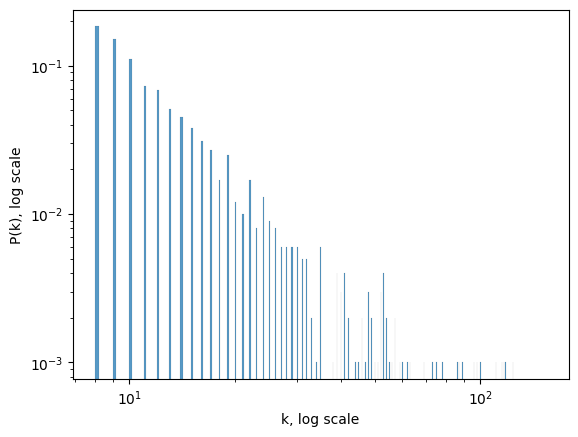

In [ ]:
# Power-law distribution 을 histogram 으로 확인
import seaborn as sns
import matplotlib.pyplot as plt

d = np.sum(S2, axis=0)
sns.histplot(d, stat='probability', binwidth=0.2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k, log scale')
plt.ylabel('P(k), log scale');

최대 degree : 154 최소 degree : 8


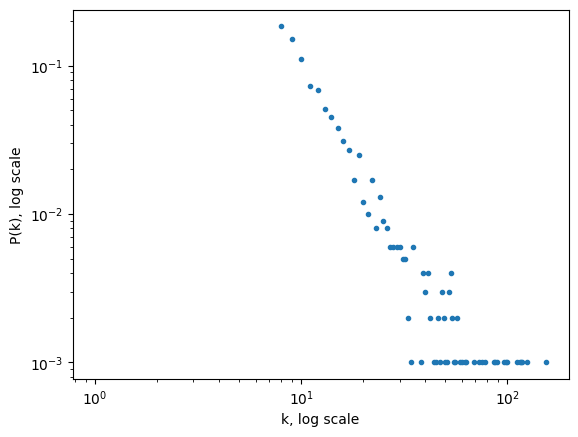

In [ ]:
# Power-law distribution 을 point 로 확인
import matplotlib.pyplot as plt

d = np.sum(S2, axis=0) # 인덱스는 노드 번호 / 요소는 해당 노드의 degree
M = int(np.max(d))
print('최대 degree :', M, '최소 degree :', int(np.min(d)))

hist_list = [0] * M # 인덱스는 degree - 1 / 요소는 해당 degree 를 갖는 노드 개수를 저장할 리스트
for i in range(M):
    hist_list[i] = list(d).count(i+1)

hist_list = np.array(hist_list)
hist_list = hist_list / np.sum(hist_list)
k = np.arange(1,M+1)
plt.plot(k, hist_list, marker='.', linestyle='')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k, log scale')
plt.ylabel('P(k), log scale');

### 방법 1과 2의 Power-law distribution 비교

방법 1 ) 최대 degree : 83 / 최소 degree : 1
방법 2 ) 최대 degree : 154 / 최소 degree : 8


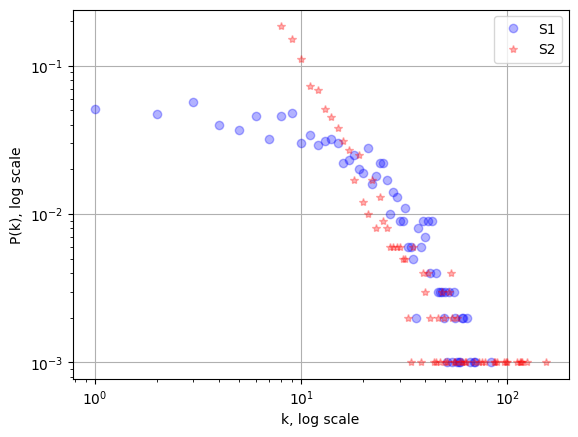

In [ ]:
import matplotlib.pyplot as plt

# S1
d1 = np.sum(S1, axis=0) # 인덱스는 노드 번호 / 요소는 해당 노드의 degree
M1 = int(np.max(d1))
print('방법 1 ) 최대 degree :', M1, '/ 최소 degree :', int(np.min(d1)))

hist_list1 = [0] * M1 # 인덱스는 degree - 1 / 요소는 해당 degree 를 갖는 노드 개수를 저장할 리스트
for i in range(M1):
    hist_list1[i] = list(d1).count(i+1)

hist_list1 = np.array(hist_list1)
hist_list1 = hist_list1 / np.sum(hist_list1) # 확률로 변환
k1 = np.arange(1,M1+1)

# S2
d2 = np.sum(S2, axis=0) # 인덱스는 노드 번호 / 요소는 해당 노드의 degree
M2 = int(np.max(d2))
print('방법 2 ) 최대 degree :', M2, '/ 최소 degree :', int(np.min(d2)))

hist_list2 = [0] * M2 # 인덱스는 degree - 1 / 요소는 해당 degree 를 갖는 노드 개수를 저장할 리스트
for i in range(M2):
    hist_list2[i] = list(d2).count(i+1)

hist_list2 = np.array(hist_list2)
hist_list2 = hist_list2 / np.sum(hist_list2) # 확률로 변환
k2 = np.arange(1,M2+1)

# 분포 비교 시각화
plt.plot(k1, hist_list1, c='blue', alpha=0.3, label='S1', marker='o', linestyle='')
plt.plot(k2, hist_list2, c='red', alpha=0.3, label='S2', marker='*', linestyle='')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k, log scale')
plt.ylabel('P(k), log scale')
plt.legend()
plt.grid();

**결과 분석**
- 방법 2에 의한 BA model 이 방법 1에 비해 더 분명하게 Power-law distribution 을 따름
- 방법 2에 의해 총 7944개의 링크가 생성되므로 56개의 링크를 적당히 채우는 방법을 생각할 수 있음

## 2. NetworkX 라이브러리를 이용한 검증 및 시각화

**References**
- https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html#barabasi-albert-graph

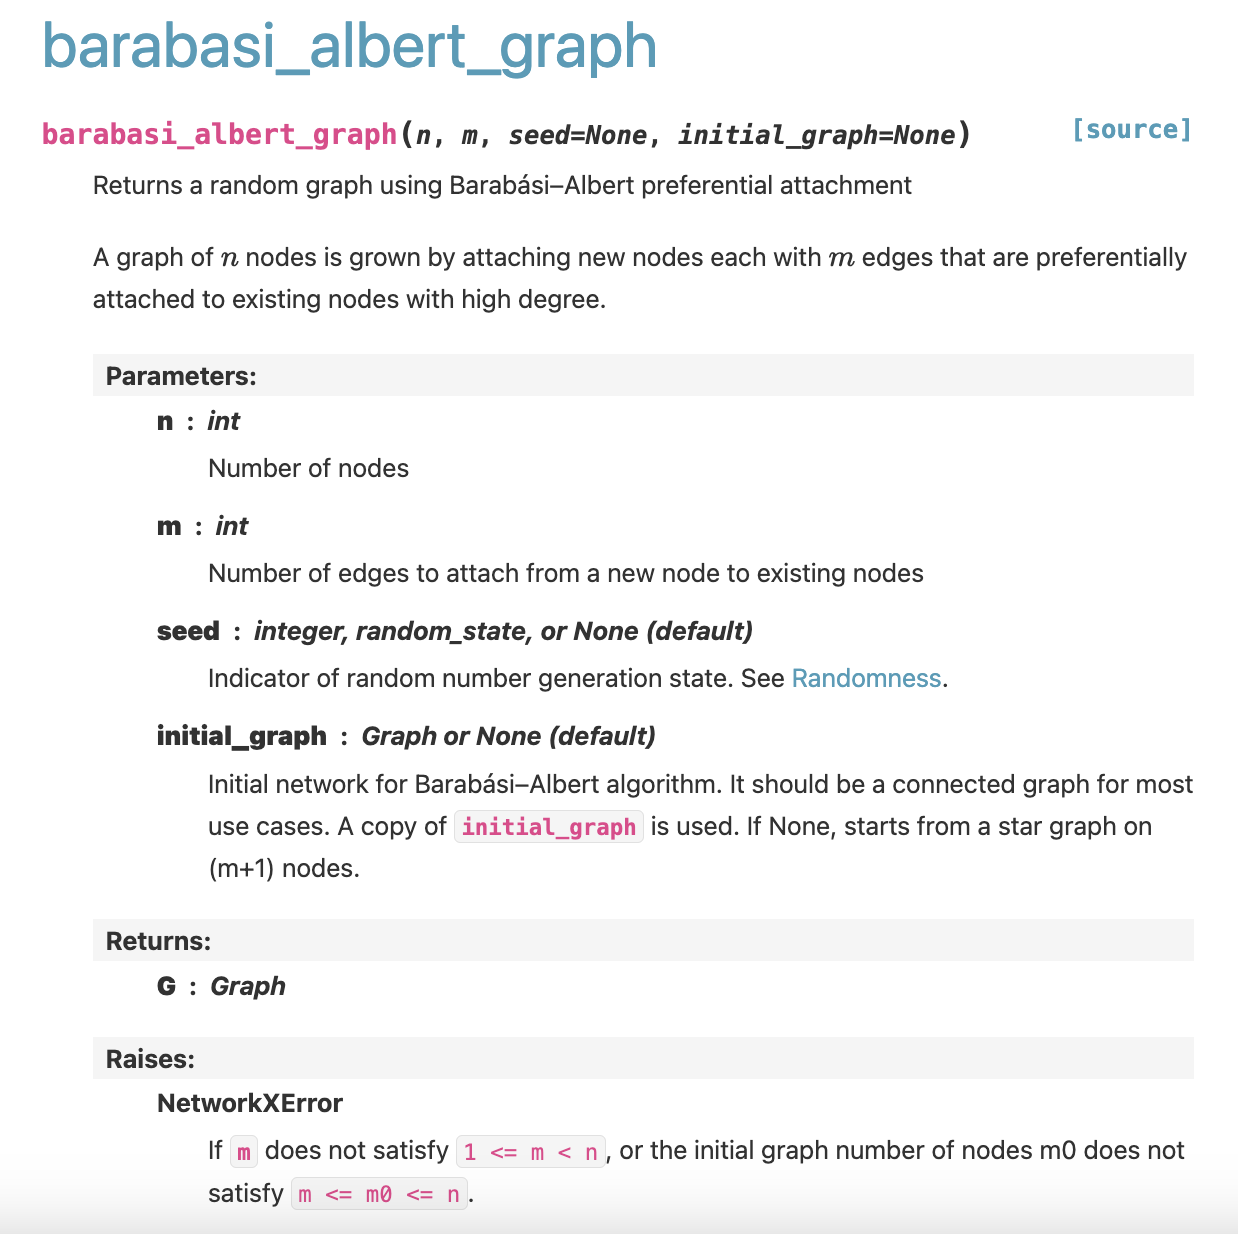

In [ ]:
import networkx as nx
# nx.barabasi_albert_graph 함수 내에 성장을 마친 그래프의 총 링크 수 직접 설정 불가
# 신규 노드 1개에 의한 추가 링크 수 m 과 초기 그래프 initial_graph 를 통해 간접 설정
# 총 약 8000개의 링크를 갖도록 적절하게 구현
N = 1000
L = 8000

# 성장 과정에서 네트워크 특성에 대한 영향력이 빠르게 사라지도록 초기 그래프로 cycle graph (ring 모양) 사용
G0 = nx.cycle_graph(n=L//N)
# 1000개의 노드와 8000개의 링크를 생성하기 위해 직관적으로 신규 노드 1개에 의한 추가 링크는 8개 정도 되어야 함
# 따라서, m 을 8로 두기 위해 초기 그래프는 최소 8개의 노드로 구성되어야 함
BA = nx.barabasi_albert_graph(n=N, m=L//N, initial_graph=G0)

# 무방향 검증 및 총 링크 수 확인
print('방향 그래프 여부 :', ['무방향','방향'][nx.is_directed(BA)])
print('총 링크 수 (약 8000개 확인) :', nx.number_of_edges(BA))

방향 그래프 여부 : 무방향
총 링크 수 (약 8000개 확인) : 7944


최대 degree : 135


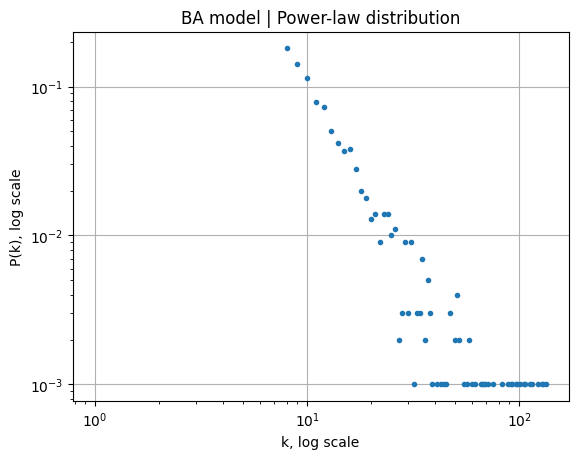

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# BA 의 degree distribution (count : degree=k 인 노드의 개수가 요소 / k 는 요소의 인덱스)
d = nx.degree_histogram(BA)
# 확률 값으로 변환
d = d / np.sum(d)
# 최대 degree
print('최대 degree :', len(d))

# Power-law distribution
plt.plot(d, marker='.', linestyle='')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k, log scale')
plt.ylabel('P(k), log scale')
plt.title('BA model | Power-law distribution')
plt.grid();

### 참고 ) networkx functions

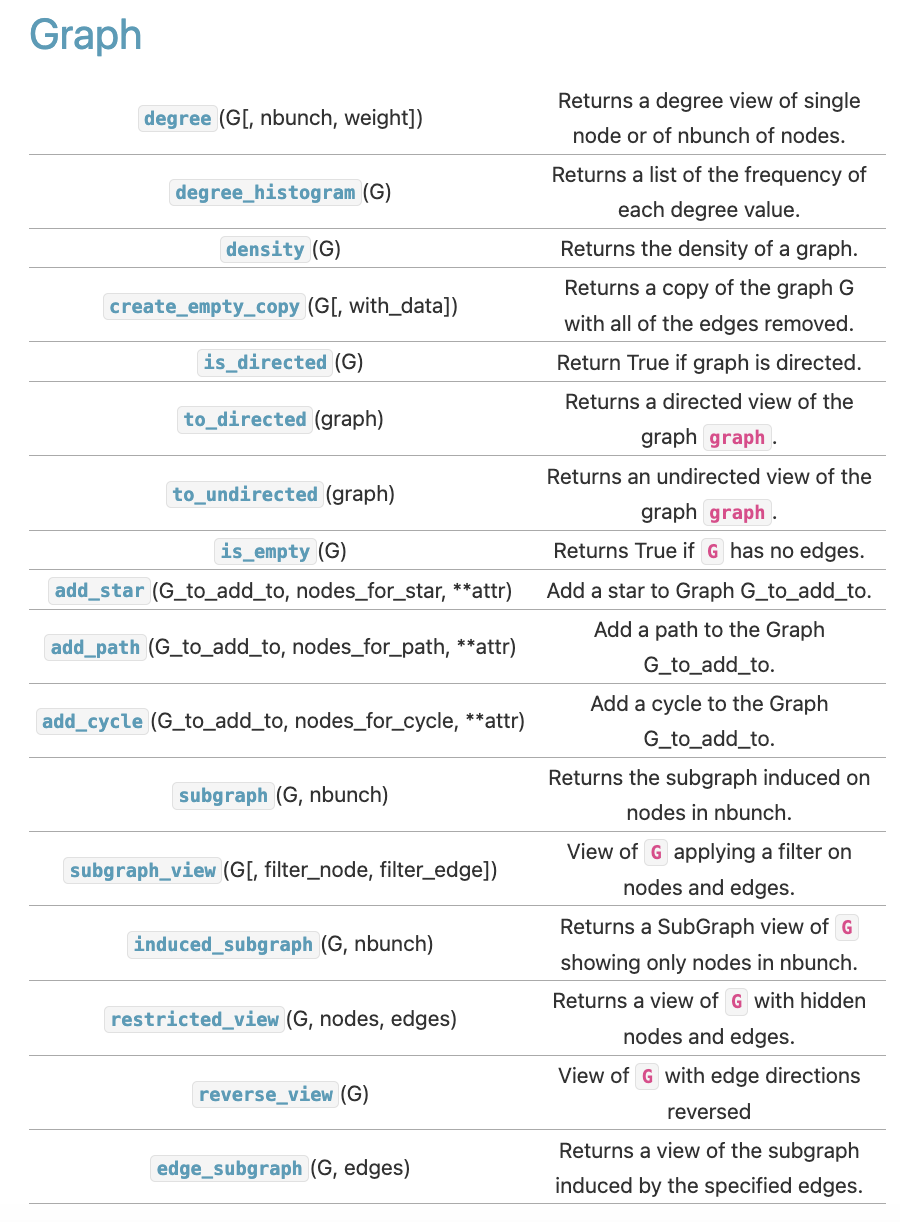

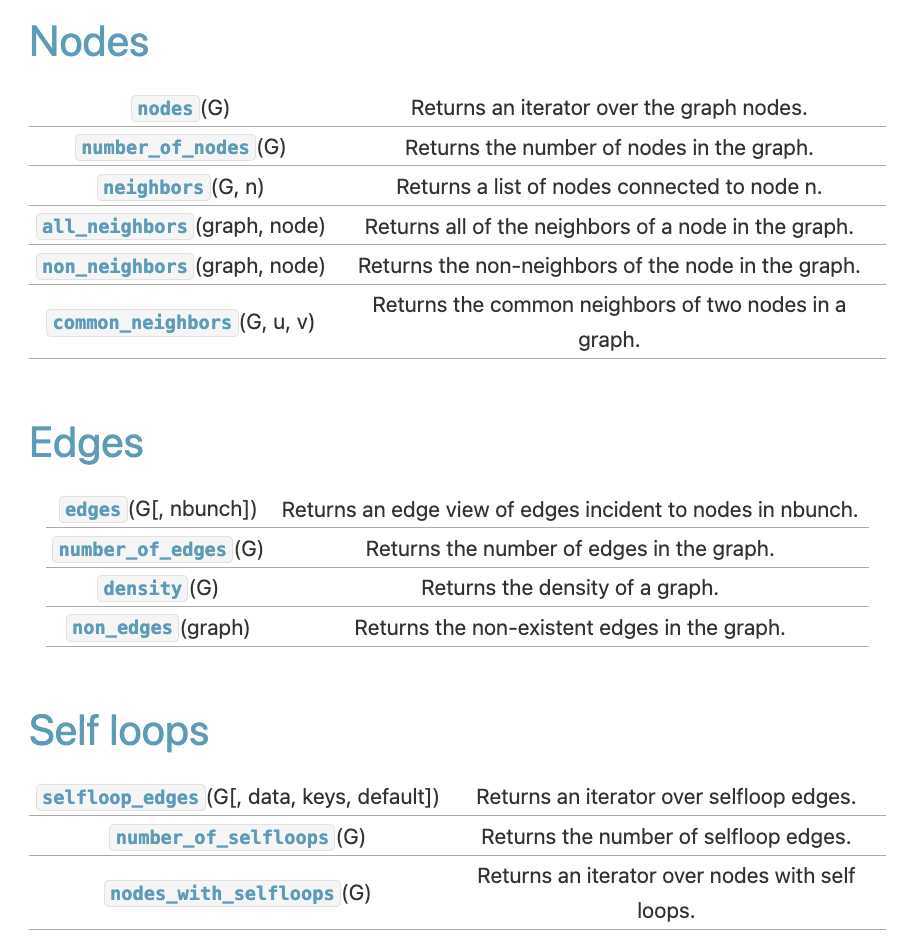

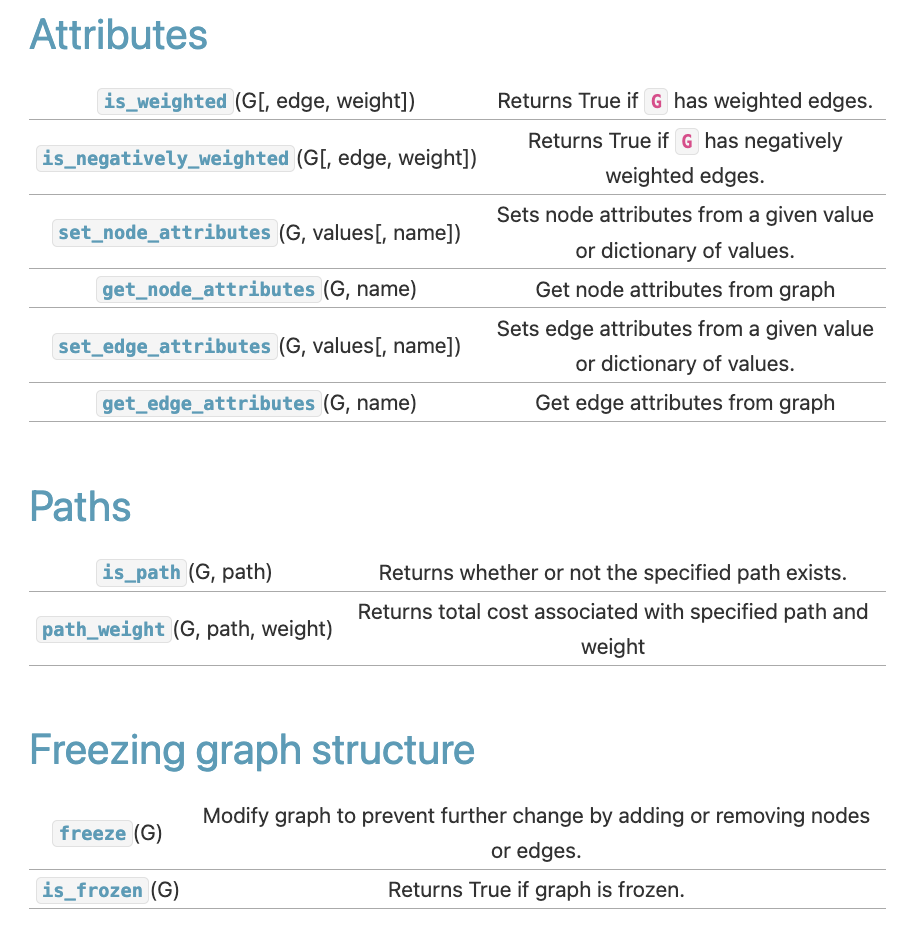

## 3. 추가 실험 ) 비슷한 크기의 ER model 과 degree distribution 차이 확인

- ER model 에서 N=1000, L=8000이 되도록 서로 다른 두 노드 간 연결 확률 p 계산
>$p\times{}_{1000}C_2=8000$  
>$\Longrightarrow p=\cfrac{8000}{{}_{1000}C_2}$

평균 degree : 16.196
이론 값 : 16.0
Symmetric
총 링크 개수 : 8098.0


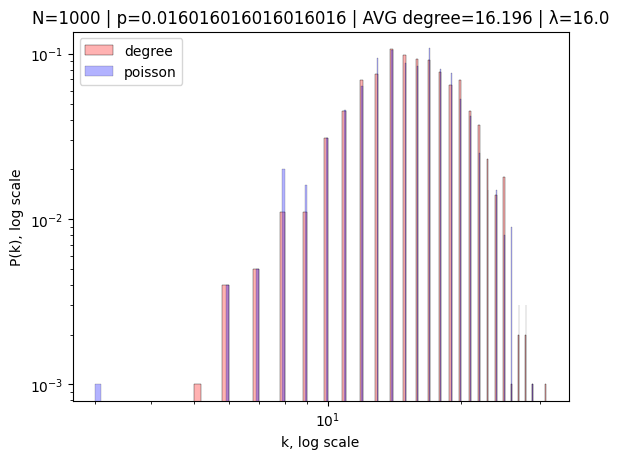

In [ ]:
# 이전 과제(by 최대상)의 랜덤 무방향 그래프 (ER model) 소스 코드 참고
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 무방향 그래프 (인접행렬이 항상 대칭행렬)
def rand_sym_adj(N=10, p=0.5):
    A = np.random.rand(N,N)
    A = (A<p).astype(int)
    np.fill_diagonal(A, 0)
    A = np.triu(A) + np.triu(A).T # 상부삼각행렬과 그 전치행렬의 합으로 대칭행렬 생성
    return A

# 앞선 BA model 의 크기와 비슷하게 생성 ) N = 1000, L = 8000, p = L / (N*(N-1)/2)
N = 1000
L = 8000
p = L / (N*(N-1)/2)

ER = rand_sym_adj(N, p)

# degree distribution
d = np.sum(ER, axis=0)
print('평균 degree :', np.mean(d))
print('이론 값 :', (N-1)*p)
print(['Error','Symmetric'][int((ER==ER.T).all())])
print('총 링크 개수 :', np.sum(ER)/2)

# ER model 의 degree distribution 이 따르는 푸아송분포의 모수이자 기댓값 λ 는 (N-1)*p
# λ 는 AVG degree 의 이론적인 추정량
sns.histplot(d, stat='probability', alpha=0.3, binwidth=0.2, color='red', label='degree')
λ = (N-1)*p
poi = np.random.poisson(λ, N)

# 분포 시각화
sns.histplot(poi, stat='probability', alpha=0.3, binwidth=0.1, color='blue', label='poisson')
plt.title(f'N={N} | p={p} | AVG degree={np.mean(d)} | λ={λ}')
# 로그 스케일로 분포 시각화하여 BA model 과 비교 가능
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k, log scale')
plt.ylabel('P(k), log scale')
plt.legend();

## 4. 관련 강의 자료

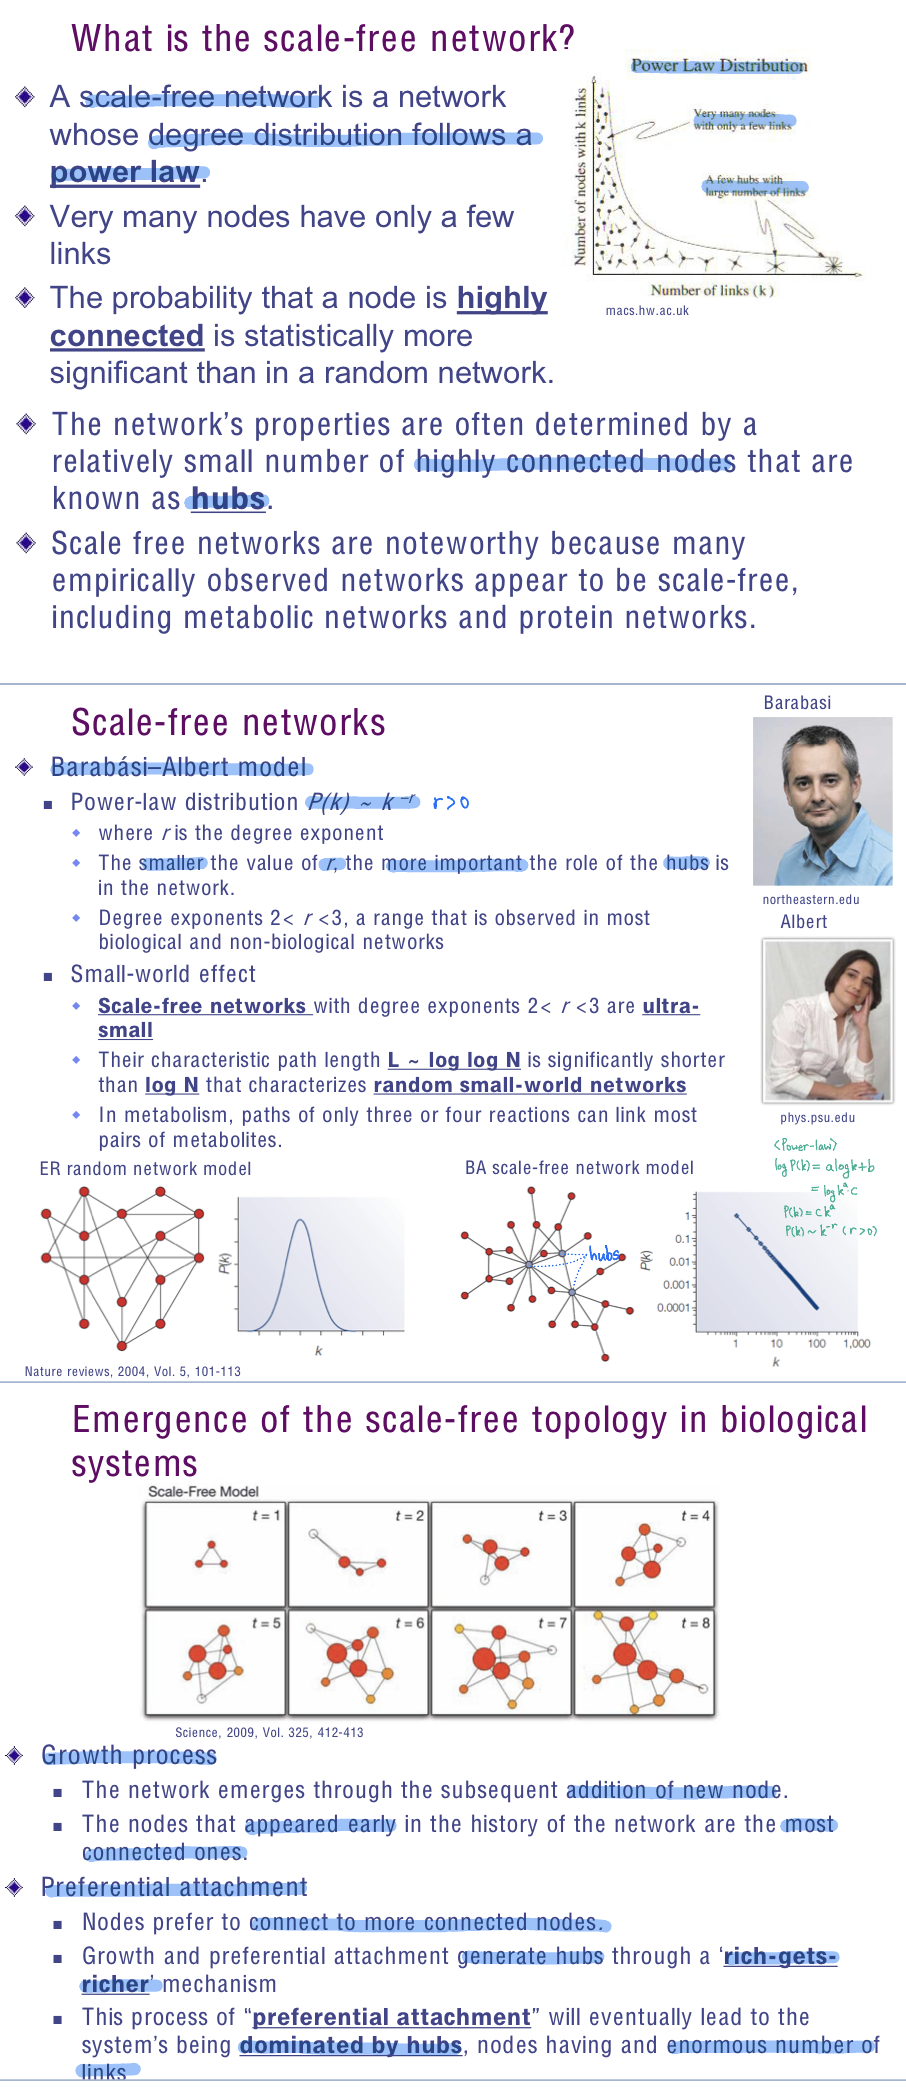